In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

# Входные и выходные переменные
temperature = ctrl.Antecedent(np.arange(0, 45, 1), 'temperature')
wetness = ctrl.Antecedent(np.arange(0, 101, 1), 'wetness')
intensity = ctrl.Consequent(np.arange(0, 7, 1), 'intensity')
# Функции принадлежности
temperature['low'] = fuzz.trapmf(temperature.universe, [0, 0, 5, 15])
temperature['optimal'] = fuzz.trimf(temperature.universe, [12, 22, 35])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 44, 44])

wetness['low'] = fuzz.trapmf(wetness.universe, [0, 0, 60, 75] )
wetness['optimal'] = fuzz.trimf(wetness.universe, [70, 80, 90])
wetness['high'] = fuzz.trimf(wetness.universe, [85, 100, 100])

intensity['low'] = fuzz.trimf(intensity.universe, [0, 0, 2] )
intensity['medium'] = fuzz.trimf(intensity.universe, [1, 2, 4])
intensity['high'] = fuzz.trimf(intensity.universe, [3, 6, 6])

c:\users\shuich1\appdata\local\programs\python\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1152x360 with 0 Axes>

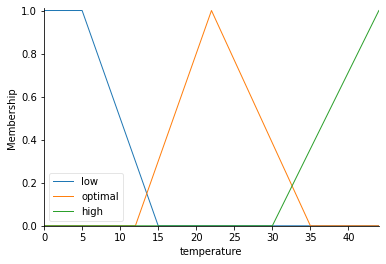

In [22]:
fig = plt.figure(figsize = (16,5))
temperature.view()
plt.show()

c:\users\shuich1\appdata\local\programs\python\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1152x360 with 0 Axes>

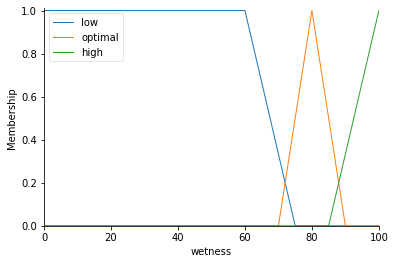

In [23]:
fig = plt.figure(figsize = (16,5))
wetness.view()
plt.show()

c:\users\shuich1\appdata\local\programs\python\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1152x360 with 0 Axes>

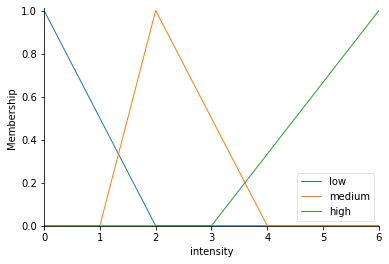

In [24]:
fig = plt.figure(figsize = (16,5))
intensity.view()
plt.show()

In [25]:
# База правил
rule1 = ctrl.Rule(temperature['high'] & wetness['optimal'], intensity['high'])
rule2 = ctrl.Rule(temperature['optimal'] & wetness['low'], intensity['high'])
rule3 = ctrl.Rule(temperature['high'] & wetness['low'], intensity['high'])
rule4 = ctrl.Rule(temperature['low'] & wetness['low'], intensity['medium'])
rule5 = ctrl.Rule(temperature['high'] & wetness['high'], intensity['medium'])
rule6 = ctrl.Rule(temperature['optimal'] & wetness['optimal'], intensity['medium'])
rule7 = ctrl.Rule(temperature['low'] & wetness['optimal'], intensity['low'])
rule8 = ctrl.Rule(temperature['optimal'] & wetness['high'], intensity['low'])
rule9 = ctrl.Rule(temperature['low'] & wetness['high'], intensity['low'])

In [26]:
watering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [27]:
watering = ctrl.ControlSystemSimulation(watering_ctrl, clip_to_bounds = False)

In [32]:
print("Введите состояние почвы")
watering.input['temperature'] = int(input("Температура почвы:"))
watering.input['wetness'] = int(input("Влажность почвы:"))

watering.compute()

Введите состояние почвы
Температура почвы:40
Влажность почвы:50


Интенсивность полива:4.936507936507938


c:\users\shuich1\appdata\local\programs\python\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


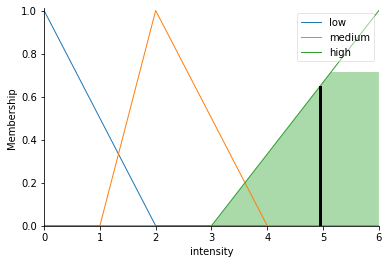

In [33]:
print ("Интенсивность полива:{}".format(watering.output['intensity']))
intensity.view(sim=watering)